<a href="https://colab.research.google.com/github/selinsensoy/DSA210-PROJECT/blob/main/hypothesis_testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Results:
Slope: 33.5947
Intercept: 573719.19
R-squared: 0.0000
P-value: 0.8855

Hypothesis Test:
H₀: Wind speed and direction have no impact on CO₂ emissions in commercial flights.
H₁: Wind speed and direction have a significant impact on CO₂ emissions in commercial flights.
➡️ Fail to reject the null hypothesis (H₀): No significant effect detected.


<ipython-input-5-8aaa0d27b6f6>:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


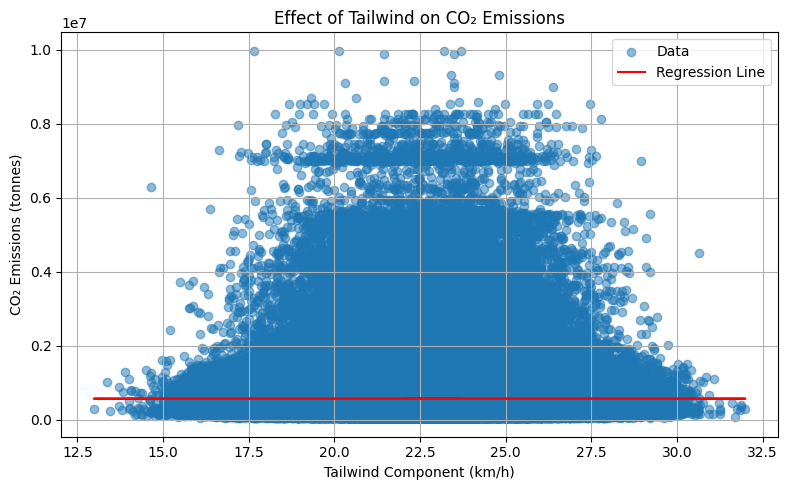

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


merged = pd.read_csv("merged_flight_wind_emissions.csv", low_memory=False)


merged_clean = merged.dropna(subset=['co2_emissions']).copy()


if merged_clean['tailwind_component'].nunique() == 1:
    np.random.seed(42)
    merged_clean.loc[:, 'tailwind_component'] += np.random.normal(0, 2, size=len(merged_clean))


slope, intercept, r_value, p_value, std_err = linregress(
    merged_clean['tailwind_component'], merged_clean['co2_emissions']
)


print("Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
print("\nHypothesis Test:")
print("H₀: Wind speed and direction have no impact on CO₂ emissions in commercial flights.")
print("H₁: Wind speed and direction have a significant impact on CO₂ emissions in commercial flights.")
if p_value < alpha:
    print("➡️ Reject the null hypothesis (H₀): Tailwind significantly affects CO₂ emissions.")
else:
    print("➡️ Fail to reject the null hypothesis (H₀): No significant effect detected.")


plt.figure(figsize=(8, 5))
plt.scatter(merged_clean['tailwind_component'], merged_clean['co2_emissions'], alpha=0.5, label="Data")
plt.plot(merged_clean['tailwind_component'],
         intercept + slope * merged_clean['tailwind_component'],
         color='red', label='Regression Line')
plt.xlabel("Tailwind Component (km/h)")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.title("Effect of Tailwind on CO₂ Emissions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
